In [5]:
%load_ext autoreload
%autoreload 2

import xarray as xr
import dfm_tools as dfmt
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
map_data = dfmt.open_partitioned_dataset(
    "/scratch-shared/mverlaan/gtsm_openDA_david/stochModel/input_dflowfm/output/gtsm_fine_0*_map.nc"
)

mdt_data = xr.load_dataset(
    "/scratch-shared/mverlaan/gtsm_openDA_david/stochModel/input_dflowfm/climate_forcing/pressure_mdt.nc"
)

>> xu.open_dataset() with 20 partition(s): 1 

[mapformat1] [nodomainvar] 2 [mapformat1] [nodomainvar] 3 [mapformat1] [nodomainvar] 4 [mapformat1] [nodomainvar] 5 [mapformat1] [nodomainvar] 6 [mapformat1] [nodomainvar] 7 [mapformat1] [nodomainvar] 8 [mapformat1] [nodomainvar] 9 [mapformat1] [nodomainvar] 10 [mapformat1] [nodomainvar] 11 [mapformat1] [nodomainvar] 12 [mapformat1] [nodomainvar] 13 [mapformat1] [nodomainvar] 14 [mapformat1] [nodomainvar] 15 [mapformat1] [nodomainvar] 16 [mapformat1] [nodomainvar] 17 [mapformat1] [nodomainvar] 18 [mapformat1] [nodomainvar] 19 [mapformat1] [nodomainvar] 20 [mapformat1] [nodomainvar] : 10.65 sec
>> xu.merge_partitions() with 20 partition(s): 17.47 sec
>> some variables dropped with merging of partitions: ['mesh2d_enc_x', 'mesh2d_enc_y', 'mesh2d_enc_part_node_count', 'mesh2d_enc_interior_ring', 'BndLink', 'FlowLink', 'FlowLinkType', 'FlowLink_xu', 'FlowLink_yu', 'FlowLinkDomain', 'windxu', 'windyu']
>> dfmt.open_partitioned_dataset() total: 28.17 sec


In [7]:
map_data = dfmt.remove_periodic_cells(map_data)

>> removing 1760 periodic cells from dataset: 22.38 sec


In [8]:
map_data

<xarray.Dataset>
Dimensions:                     (nmesh2d_EnclosureInstance: 1, time: 7,
                                 nNetNode: 1737471, nNetElem: 1942715,
                                 nNetElemMaxNode: 4, nFlowElemContourPts: 4,
                                 nNetLink: 3680878, nNetLinkContourPts: 4,
                                 nNetLinkPts: 2)
Coordinates:
  * time                        (time) datetime64[ns] 2014-05-25 ... 2014-05-...
    NetNode_x                   (nNetNode) float64 dask.array<chunksize=(89673,), meta=np.ndarray>
    NetNode_y                   (nNetNode) float64 dask.array<chunksize=(89673,), meta=np.ndarray>
  * nNetNode                    (nNetNode) int64 0 1 2 ... 1737469 1737470
    FlowElem_xcc                (nNetElem) float64 dask.array<chunksize=(99851,), meta=np.ndarray>
    FlowElem_ycc                (nNetElem) float64 dask.array<chunksize=(99851,), meta=np.ndarray>
  * nNetElem                    (nNetElem) int64 0 1 2 ... 1942713 1942714
  * nNetLink                    (nNetLink) int64 0 1 2 ... 3680876 3680877
Dimensions without coordinates: nmesh2d_EnclosureInstance, nNetElemMaxNode,
                                nFlowElemContourPts, nNetLinkContourPts,
                                nNetLinkPts
Data variables: (12/30)
    mesh2d_enc_node_count       (nmesh2d_EnclosureInstance) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mesh2d_enclosure_container  float32 ...
    wgs84                       int32 ...
    timestep                    (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    NetNode_z                   (nNetNode) float64 dask.array<chunksize=(89673,), meta=np.ndarray>
    NetElemLink                 (nNetElem, nNetElemMaxNode) int32 dask.array<chunksize=(99851, 4), meta=np.ndarray>
    ...                          ...
    NetLinkType                 (nNetLink) int32 dask.array<chunksize=(189553,), meta=np.ndarray>
    NetLinkContour_x            (nNetLink, nNetLinkContourPts) float64 dask.array<chunksize=(189553, 4), meta=np.ndarray>
    NetLinkContour_y            (nNetLink, nNetLinkContourPts) float64 dask.array<chunksize=(189553, 4), meta=np.ndarray>
    NetLink_xu                  (nNetLink) float64 dask.array<chunksize=(189553,), meta=np.ndarray>
    NetLink_yu                  (nNetLink) float64 dask.array<chunksize=(189553,), meta=np.ndarray>
    ElemLink                    (nNetLink, nNetLinkPts) int32 dask.array<chunksize=(189553, 2), meta=np.ndarray>
Attributes:
    institution:    Deltares
    references:     http://www.deltares.nl
    source:         Deltares, D-Flow FM Version 1.2.177.142431, Jan 26 2023, ...
    history:        Created on 2023-09-18T09:26:54+0200, D-Flow FM
    date_created:   2023-09-18T09:26:54+0200
    date_modified:  2023-09-18T09:26:54+0200
    Conventions:    UGRID-0.9
    uuid:           f4d16863-84a1-4404-8e64-dc3d6c2e60a4

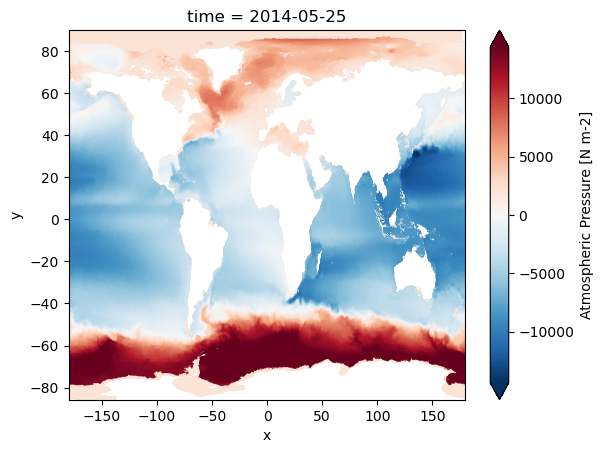

In [9]:
map_data.isel(time=0).Patm.ugrid.plot(robust=True)

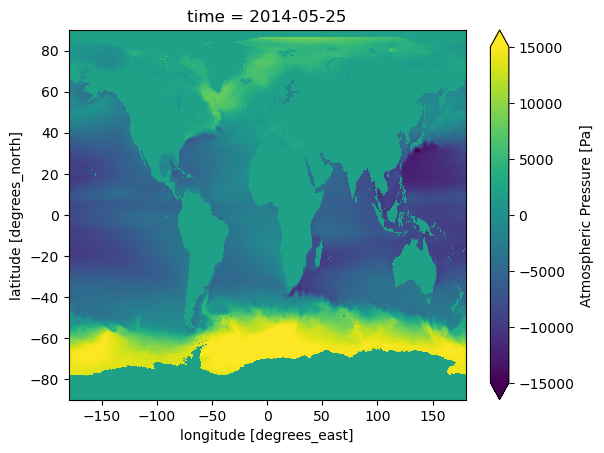

In [10]:
mdt_data.isel(time=0).p.plot(vmin=-15000, vmax=15000)

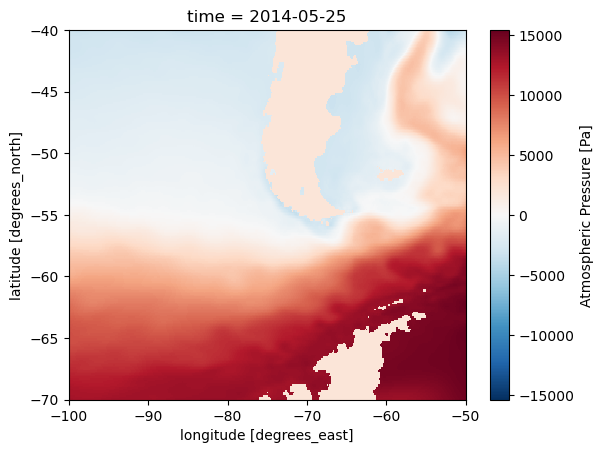

In [11]:
mdt_data.sel(x=slice(-100, -50), y=slice(-70, -40)).isel(time=0).p.plot()

In [12]:
xr.open_dataset(
    "/scratch-shared/mverlaan/experiment_gtsm/algorithm/kgStorage_201406020000/kalmanGainStorage.nc"
)

<xarray.Dataset>
Dimensions:             (time_stamp_dimension: 1, station_dimension: 4,
                         2DPressureNoise_dimension_0: 181,
                         2DPressureNoise_dimension_1: 361,
                         s1_0000_dimension_0: 99851,
                         s1_0001_dimension_0: 99206,
                         s1_0002_dimension_0: 99400,
                         ...
                         s1_0013_dimension_0: 99941,
                         s1_0014_dimension_0: 99098,
                         s1_0015_dimension_0: 98516,
                         s1_0016_dimension_0: 99235,
                         s1_0017_dimension_0: 98651,
                         s1_0018_dimension_0: 98360, s1_0019_dimension_0: 99622)
Dimensions without coordinates: time_stamp_dimension, station_dimension,
                                2DPressureNoise_dimension_0,
                                2DPressureNoise_dimension_1,
                                s1_0000_dimension_0, s1_0001_dimension_0,
                                s1_0002_dimension_0, s1_0003_dimension_0,
                                s1_0004_dimension_0, s1_0005_dimension_0,
                                ...
                                s1_0008_dimension_0, s1_0009_dimension_0,
                                s1_0010_dimension_0, s1_0011_dimension_0,
                                s1_0012_dimension_0, s1_0013_dimension_0,
                                s1_0014_dimension_0, s1_0015_dimension_0,
                                s1_0016_dimension_0, s1_0017_dimension_0,
                                s1_0018_dimension_0, s1_0019_dimension_0
Data variables: (12/24)
    time_stamp          (time_stamp_dimension) timedelta64[ns] ...
    observation_offset  (station_dimension) timedelta64[ns] ...
    station_id          (station_dimension) |S64 ...
    2DPressureNoise     (station_dimension, 2DPressureNoise_dimension_0, 2DPressureNoise_dimension_1) float64 ...
    s1_0000             (station_dimension, s1_0000_dimension_0) float64 ...
    s1_0001             (station_dimension, s1_0001_dimension_0) float64 ...
    ...                  ...
    s1_0014             (station_dimension, s1_0014_dimension_0) float64 ...
    s1_0015             (station_dimension, s1_0015_dimension_0) float64 ...
    s1_0016             (station_dimension, s1_0016_dimension_0) float64 ...
    s1_0017             (station_dimension, s1_0017_dimension_0) float64 ...
    s1_0018             (station_dimension, s1_0018_dimension_0) float64 ...
    s1_0019             (station_dimension, s1_0019_dimension_0) float64 ...
Attributes:
    title:        Kalman gain data
    institution:  OpenDA Association
    source:       Written by OpenDA
    history:      Created at Fri Sep 15 17:07:18 CEST 2023
    references:   http://www.openda.org
    Conventions:  CF-1.6
    Comment:      algorithm = EnKF\nmodel = ThreadStochModelInstance\nobserve...